# Tutorial 2: Linear Classification

### Imports

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Classification with Iris

We're going to use the Iris Dataset.                                              
2 flower classes (Setosa & Versicolour).                                        
2 features (length & width of sepal).                                             

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Visualize Data

/home/hirovi/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # Remove the CWD from sys.path while we load stuff.


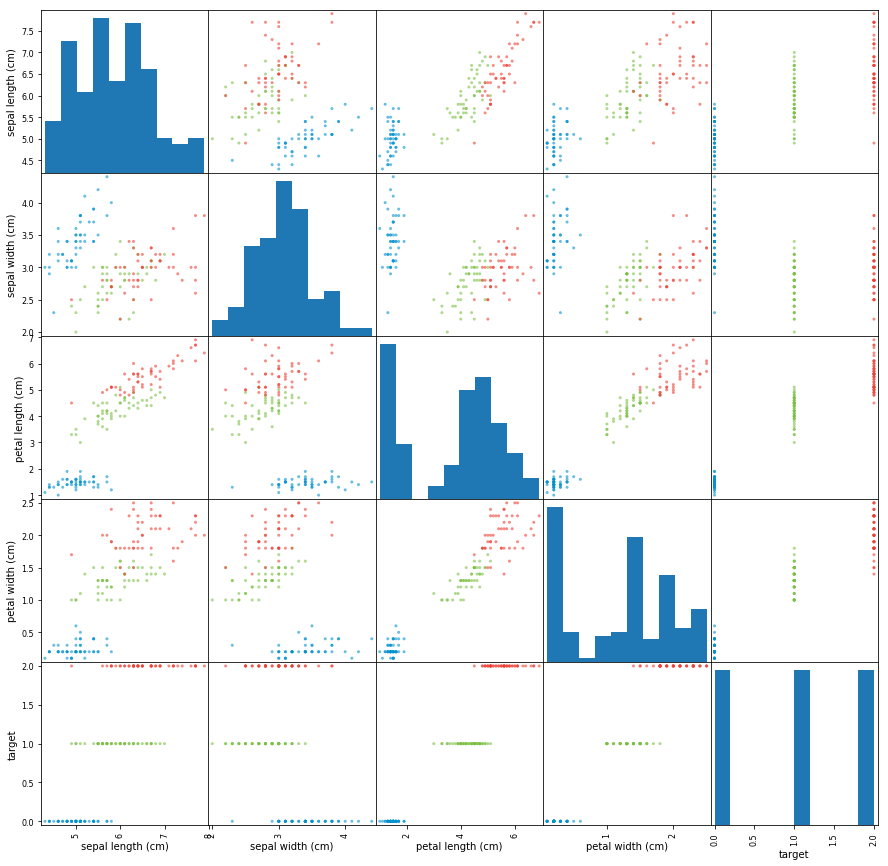

In [32]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

In [34]:
# Select 100 samples of 2 flower classes
# Select 2 features

sepal_len = iris['data'][:100,0]
sepal_wid = iris['data'][:100,1]
labels = iris['target'][:100]

# Center data. This doesn't mean that you can
# always remove biases if you center data.
sepal_len -= np.mean(sepal_len)
sepal_wid -= np.mean(sepal_wid)

Text(0,0.5,'Sepal Width')

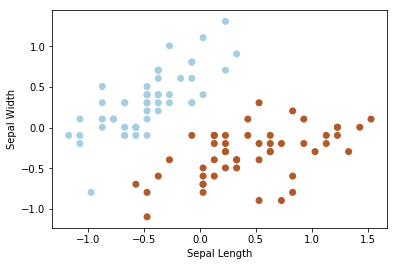

In [43]:
# Plot iris
plt.scatter(sepal_len, sepal_wid,c=labels, cmap=plt.cm.Paired)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

### Plot Decision Boundary

Plot decision boundary hypothese for classification as Setosa.

\begin{equation*}
w_1 x_1 + w_2 x_2 \ge 0
\end{equation*}

Remember, target is true if greater or equal than 0.

In [219]:
def plot_sep(w, color='green'):
    '''
    Plot decision boundary hypothesis 
      w1 * sepal_len + w2 * sepal_wid = 0
    in input space, highlighting the hyperplane
    '''
    b = w[0]
    w1 = w[1]
    w2 = w[2]
    plt.scatter(sepal_len, 
                sepal_wid,
                c=labels,
                cmap=plt.cm.Paired)
    plt.title("Separation in Input Space")
    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,2])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    if w2 != 0:
        m = -w1/w2 
        t = 1 if w2 > 0 else -1
        plt.plot(
            [-1.5,2.0], 
            [-1.5*m, 2.0*m], 
            '-y', 
            color=color)
        plt.fill_between(
            [-1.5, 2.0],
            [m*-1.5, m*2.0],
            [t*1.5, t*1.5],
            alpha=0.2,
            color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],
                 [-1.5, 2.0],
                 '-y',
                color=color)
        plt.fill_between(
            [0, 2.0*t],
            [-1.5, -2.0],
            [1.5, 2],
            alpha=0.2,
            color=color)

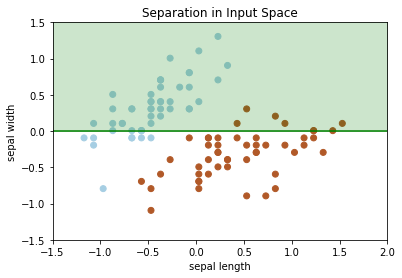

In [220]:
plot_sep([0, 0, 1])

### Gradient Descent for Multiclass Logistic Regression

Note: Loss cross entropy derivation is avoided and final result is shown.

\begin{equation*}
{\bf z} = {\bf W}{\bf x} + {\bf b} \\
{\bf y} = \text{softmax}({\bf z}) \\
{\mathcal L}_\text{CE} = -{\bf t}^T(\log \bf{y}) = x_j (y_k - t_k)
\end{equation*}

In [221]:
# Add bias as w0 to the input matrix
x = np.stack([np.ones(len(sepal_len)), sepal_len, sepal_wid], axis=-1)
t = labels

In [232]:
def softmax(x):
    #return np.exp(x) / np.sum(np.exp(x))
    return np.exp(x - max(x)) / np.sum(np.exp(x - max(x)))

def gradfn(w,x,t):
    z = np.matmul(w, x.T)
    y = softmax(z)
    dW = np.matmul(x.T, (y-t))
    return dW

def solve_grad_descent(x,t, print_every=5000, iterations=20000, alpha=0.001):
    #rows=number of examples, col=possible attributes
    rows, col = np.shape(x)
    #initialise weights with random val
    w = np.random.rand(col)
    prev_rat = 0
    for i in range(iterations):
        dw = gradfn(w, x, t)
        w -= alpha*dw
        rat = w[1]/w[0]
        if i%print_every==0:
            print( 'Weight after %d iteration: %s' % (i, str(w)))
    return w    

In [233]:
w = solve_grad_descent(x,t)

Weight after 0 iteration: [0.80465214 0.19892582 0.2788847 ]
Weight after 5000 iteration: [245.80465214 109.93512681 -79.34497109]
Weight after 10000 iteration: [ 490.80465214  219.54012085 -158.87498316]
Weight after 15000 iteration: [ 735.80465214  329.14512085 -238.40498316]


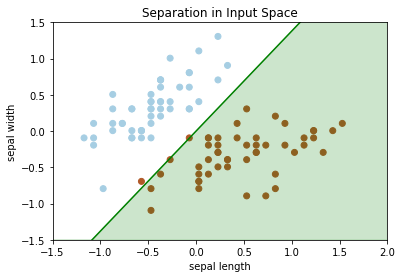

In [234]:
plot_sep(w)